# INTRODUCTION TO NUMPY II

## COMPUTATION ON ARRAYS: BROADCASTING

### INTRODUCING BROADCASTING

In [1]:
import numpy as np

In [2]:
a = np.array([0,1,2])
b = np.array([5,5,5])
a + b

array([5, 6, 7])

In [3]:
a+ 5

array([5, 6, 7])

In [4]:
M = np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [5]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [6]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [7]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Broadcasting example 1

In [8]:
M = np.ones((2,3))
a = np.arange(3)

In [9]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

#### Broadcasting example 2

In [10]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)

In [11]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Broadcasting example 3

In [12]:
M = np.ones((3,2))
a = np.arange(3)

In [13]:
## M + a results in an error when a tries to get broadcasted to match with M

In [15]:
a[:, np.newaxis].shape

(3, 1)

In [16]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [17]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

### BROADCASTING IN PRACTICE

#### Centering an array

In [18]:
X = np.random.random((10,3))

In [19]:
Xmean = X.mean(0) ## finding the mean across columns
Xmean

array([0.38250799, 0.45378627, 0.60743352])

In [20]:
X_centered = X - Xmean

In [21]:
X_centered_mean = X_centered.mean(0)

### PLOTTING TWO DIMENSIONAL FUNCTIONS

In [22]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:,np.newaxis]
z = np.sin(x)**10 + np.cos(10+ y*x)*np.cos(x)

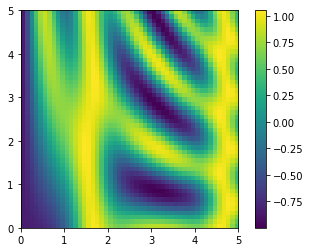

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin = 'lower', extent = [0,5,0,5], cmap = 'viridis')
plt.colorbar();

## COMPARISONS, MASKS AND BOOLEAN LOGIC

### EXAMPLE: COUNTING RAINY DAYS

In [26]:
import numpy as np
import pandas as pd

In [27]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jrrJQsEKOGRWXFFklEuKojnR9F8od1xlka6pEowHgzxY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='pythondatascience-donotdelete-pr-jl8wcvlzsg1qfd',Key='FIFA 19.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,sofifa_id,player_url,short_name,Full Name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,2/5/1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,6/24/1987,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,2/5/1992,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,11/7/1990,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,6/28/1991,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [29]:
df = df_data_1['overall'].values

In [30]:
import seaborn; seaborn.set()  # set plot styles

(array([ 312., 1251., 2688., 3854., 4994., 3064., 1057.,  439.,   96.,
          15.]),
 array([47. , 51.7, 56.4, 61.1, 65.8, 70.5, 75.2, 79.9, 84.6, 89.3, 94. ]),
 <a list of 10 Patch objects>)

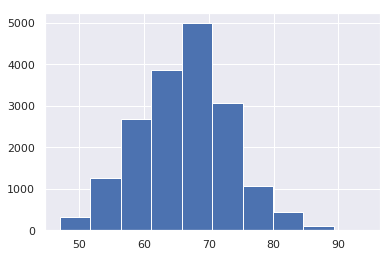

In [31]:
plt.hist(df, 10)

### COMPARISON OPERATORS AS UFUNCS

In [32]:
x = np.array([1,2,3,4,5])

In [33]:
x < 3

array([ True,  True, False, False, False])

In [34]:
x > 3

array([False, False, False,  True,  True])

In [35]:
x <= 3

array([ True,  True,  True, False, False])

In [36]:
x >= 3

array([False, False,  True,  True,  True])

In [37]:
x != 3

array([ True,  True, False,  True,  True])

In [38]:
(2 ** x) == (x ** 2)

array([False,  True, False,  True, False])

In [39]:
rng = np.random.RandomState(0)
x = rng.randint(10, size = (3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [40]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

### WORKING WITH BOOLEAN ARRAYS

In [41]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


#### COUNTING ENTRIES

In [42]:
np.count_nonzero(x < 6) # counting the nonzero values lesser than 6

8

In [43]:
np.sum(x < 6) # how many values are lesser than 6

8

In [44]:
np.sum(x < 6, axis = 1) # how many values are lesser than 6 by rows

array([4, 2, 2])

In [45]:
np.any(x > 8) # are there any values greater than 8

True

In [46]:
np.any(x < 0) # are there any values less than 0

False

In [47]:
np.all(x < 10) # are all values less than 10

True

In [48]:
np.all(x == 6) # are all values equal to 6

False

In [50]:
np.all(x < 8, axis = 1) # are all values lesser than 8 by rows

array([ True, False,  True])

#### BOOLEAN OPERATORS

In [54]:
np.sum((df < 90) & (df > 60))

14210

In [56]:
np.sum(~((df <= 60) | (df >= 90)))

14210

In [58]:
print("Number of players with ratings equal to 90:", np.sum(df == 90))
print("Number of players with ratings greater than 90:", np.sum(df > 90))

Number of players with ratings equal to 90: 6
Number of players with ratings greater than 90: 9


#### BOOLEAN ARRAYS AS MASKS

In [59]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [60]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [61]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [65]:
# constructing a mask for footballers' ratings greater than 80
df_foot = (df >= 80)
df_foot2 = ((df < 88) & (df > 82))
print("Median ratings for players with 80+ ratings:", np.median(df[df_foot]))
print("Median ratings for players with ratings between 82 and 88:", np.median(df[df_foot2]))
print("Max rating of all players:", np.max(df[df_foot]))
print("Median ratings for players with ratings greater than 80 but not within 82 and 88:", np.median(df[df_foot & ~df_foot2]))

Median ratings for players with 80+ ratings: 82.0
Median ratings for players with ratings between 82 and 88: 84.0
Max rating of all players: 94
Median ratings for players with ratings greater than 80 but not within 82 and 88: 81.0


### ASIDE USING THE KEYWORDS AND/OR VERSUS THE OPERATORS &/|

In [66]:
bool(42),bool(0)

(True, False)

In [67]:
bool(42 and 0)

False

In [68]:
bool(42 or 0)

True

In [69]:
bin(42) ## when & or | is used, the bits of the numbers are expressed

'0b101010'

In [70]:
bin(59)

'0b111011'

In [71]:
bin(42 & 59)

'0b101010'

In [72]:
bin(42|59)

'0b111011'

In [73]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [75]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

## EXPLORING FANCY INDEXING

In [77]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size = 10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [78]:
[x[3],x[7],x[2]]

[71, 86, 14]

In [79]:
ind = [3,7,4]
x[ind]

array([71, 86, 60])

In [81]:
ind = np.array([[3,7],[4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [96]:
X = np.arange(12).reshape(3,4)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [83]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [84]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [85]:
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

### COMBINED INDEXING

In [86]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [87]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [98]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [90]:
mask = np.array([1,0,1,0], dtype = bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

#### Example: Selecting Data Points

In [106]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

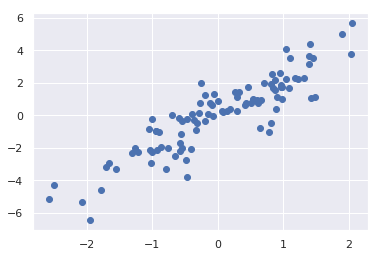

In [107]:
plt.scatter(X[:, 0], X[:, 1]);

In [108]:
indices = np.random.choice(X.shape[0],20, replace = True)
indices

array([61, 47, 44, 98, 16, 17, 20, 36, 78, 75, 26, 41, 61, 94, 45, 71, 28,
       48, 74, 49])

In [109]:
selection = X[indices]
selection.shape

(20, 2)

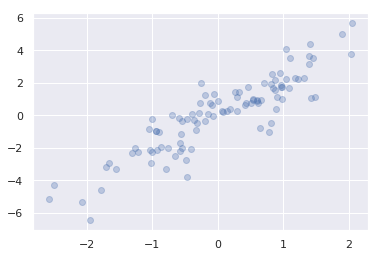

In [110]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

#### Modifying values with Fancy Indexing

In [111]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [112]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [113]:
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [114]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [115]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


#### Example: Bining Data

In [116]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

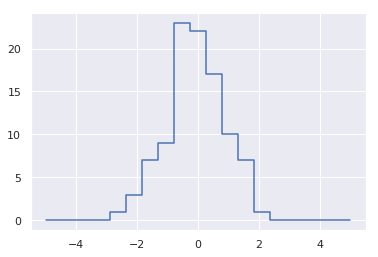

In [118]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

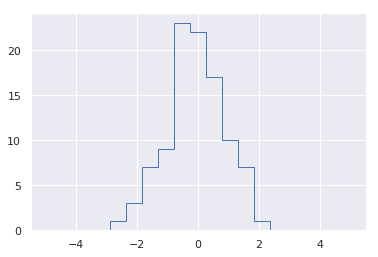

In [119]:
plt.hist(x, bins, histtype='step');

In [120]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
29.3 µs ± 642 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
15.8 µs ± 533 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [121]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
78.2 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
124 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## SORTING ARRAYS

In [122]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [123]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [124]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [125]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

### Fast sorting in NumPy: np.sort and np.agsort

In [126]:
np.sort(x)

array([1, 2, 3, 4, 5])

In [128]:
x.sort()
print(x)

[1 2 3 4 5]


In [129]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x) ## argsort returns the indices
print(i)

[1 0 3 2 4]


In [130]:
x[i]

array([1, 2, 3, 4, 5])

#### Sorting along rows and columns

In [131]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [132]:
# sort each column of X
np.sort(X, axis =0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [133]:
np.sort(X, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### Partial Sorts: Partitioning

In [134]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [135]:
np.partition(X, 2,axis = 1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [136]:
np.argpartition(x,2) ## argpartition like argsort but it outputs indices

array([3, 1, 2, 0, 4, 5, 6])

### Example : K-Nearest Neighbors

In [138]:
X = rand.rand(10,2)

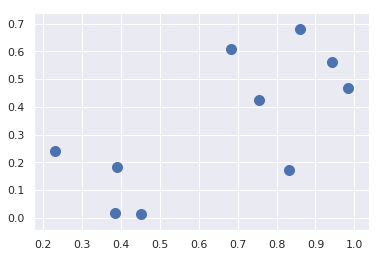

In [139]:
plt.scatter(X[:, 0], X[:, 1], s=100);

In [140]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [141]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [143]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [144]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [145]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [146]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 1 7 6 8 2 4 5]
 [1 3 6 0 9 7 8 5 2 4]
 [2 4 8 5 7 9 6 0 3 1]
 [3 0 1 9 6 7 8 2 4 5]
 [4 2 8 5 7 9 6 0 3 1]
 [5 8 4 2 9 6 7 1 3 0]
 [6 1 9 3 0 7 8 5 2 4]
 [7 9 0 3 2 8 6 4 1 5]
 [8 4 5 2 9 7 6 0 3 1]
 [9 6 0 3 7 1 8 2 4 5]]


In [147]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

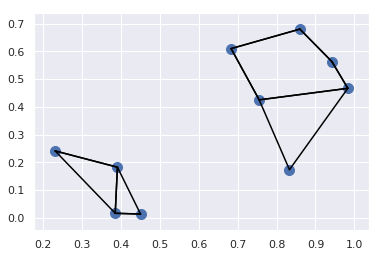

In [148]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

## STRUCTURED DATA: NUMPY's STRUCTURED ARRAYS

In [149]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [150]:
x = np.zeros(4, dtype = int)

In [151]:
data = np.zeros(4, dtype = {"names": ('name', 'age', 'weight'),
                            "formats": ('U10','i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [152]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [153]:
# Get all names
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [154]:
# Get first row of data
data[0]

('Alice', 25, 55.)

In [155]:
# Get the name from the last row
data[-1]['name']

'Doug'

In [156]:
# Get names where age is under 30
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

### Creating Structured Arrays

In [157]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [158]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [159]:
np.dtype([('name','S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [160]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

### More Advanced Compound Arrays

In [161]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### Record Arrays: Structured Arrays with a Twist

In [162]:
data['age']

array([25, 45, 37, 19], dtype=int32)

In [163]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

In [164]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

195 ns ± 5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
4.12 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.32 µs ± 240 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [166]:
data = pd.DataFrame({'age':age,'weight':weight}, index = name)

In [167]:
data['age']

Alice    25
Bob      45
Cathy    37
Doug     19
Name: age, dtype: int64

In [168]:
data['weight']

Alice    55.0
Bob      85.5
Cathy    68.0
Doug     61.5
Name: weight, dtype: float64

In [170]:
data['weight'].dtype

dtype('float64')

In [171]:
data.size

8

In [172]:
data.shape

(4, 2)

In [173]:
data.ndim

2